In [1]:
# Задача 1. Разбить изображения на кластеры с помощью алгоритма k-means.

from sklearn.cluster import KMeans
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Создание модели.
model = KMeans(n_clusters = 10, random_state=200)
x_train = x_train.reshape(60000, 784)

In [4]:
x_train = x_train/255

In [5]:
# Обучение модели.
model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=200, tol=0.0001, verbose=0)

In [6]:
# Кластеризация данных.
predictions = model.predict(x_train[:500].reshape(500, 784))

cluster 0
64 elements


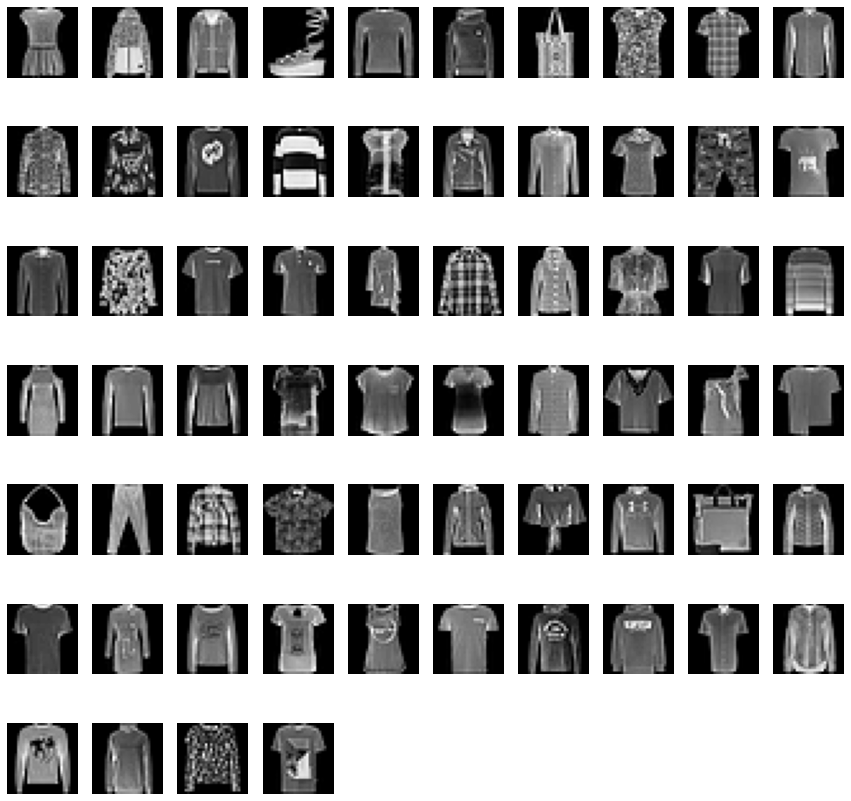

cluster 1
28 elements


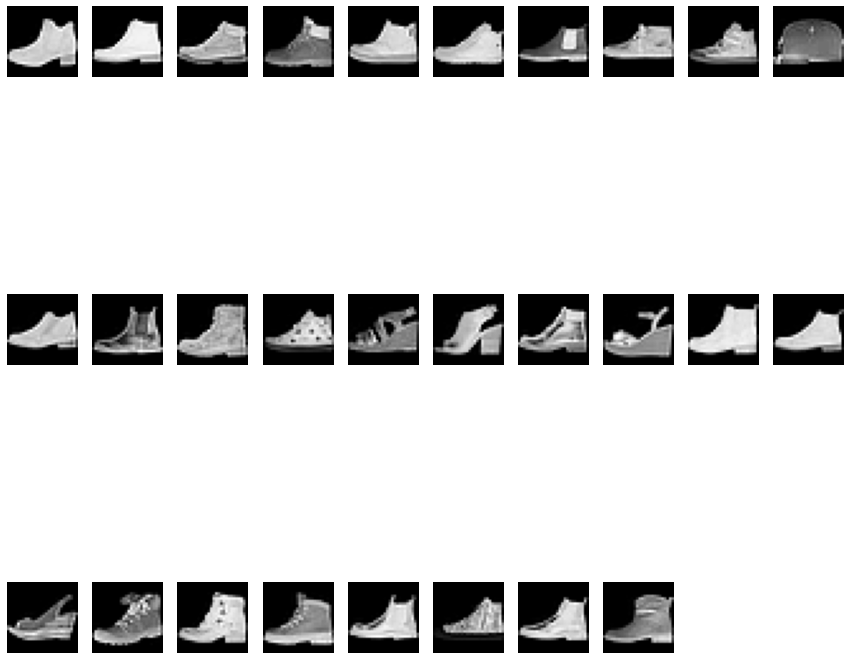

cluster 2
20 elements


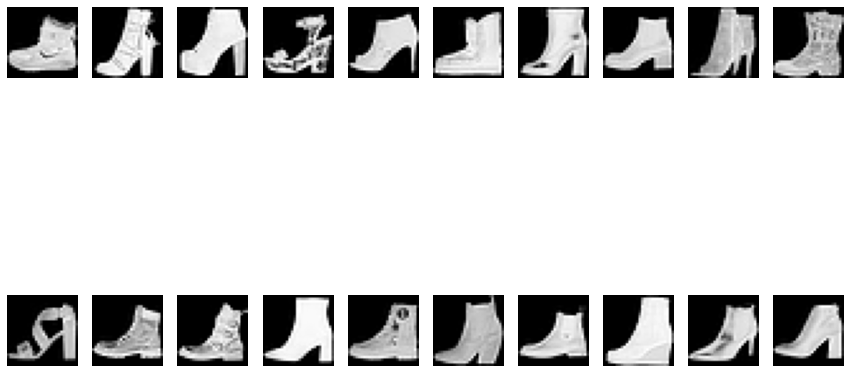

cluster 3
82 elements


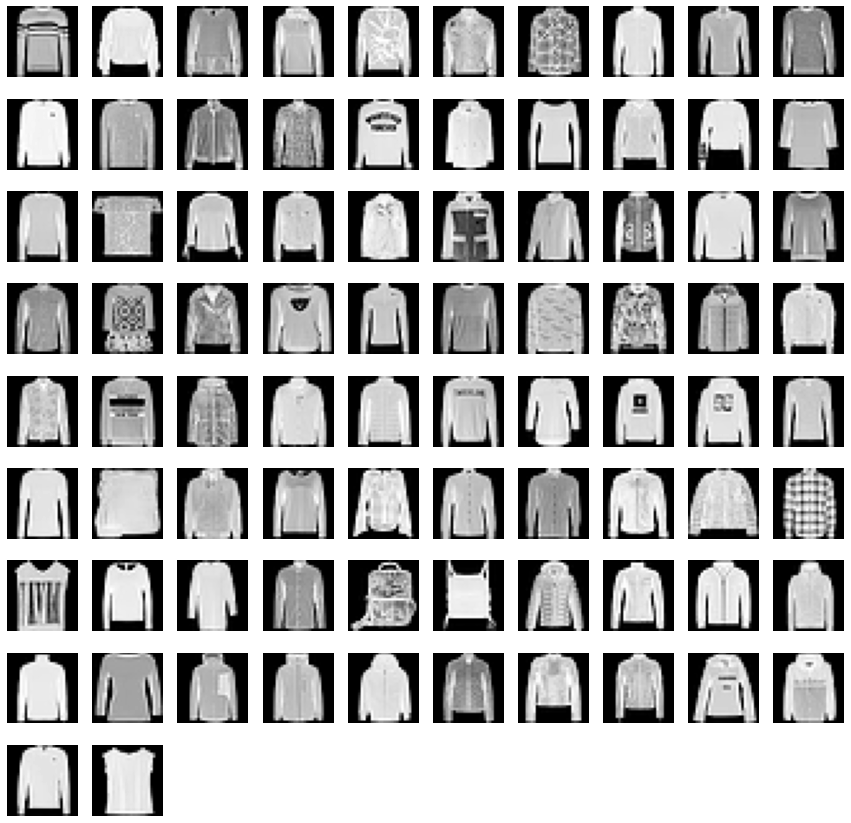

cluster 4
65 elements


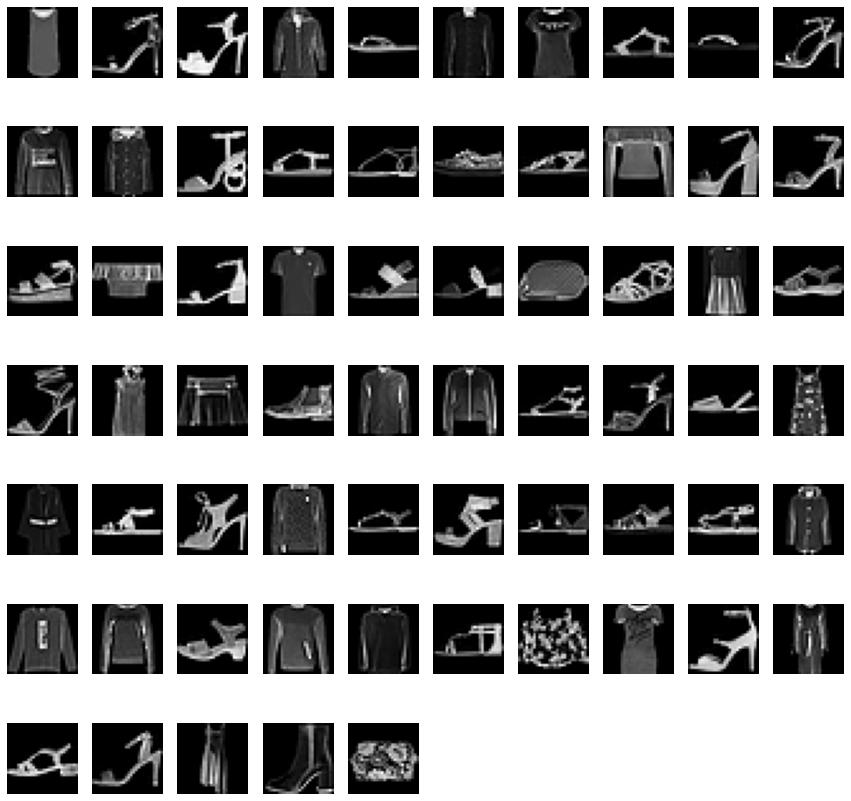

cluster 5
86 elements


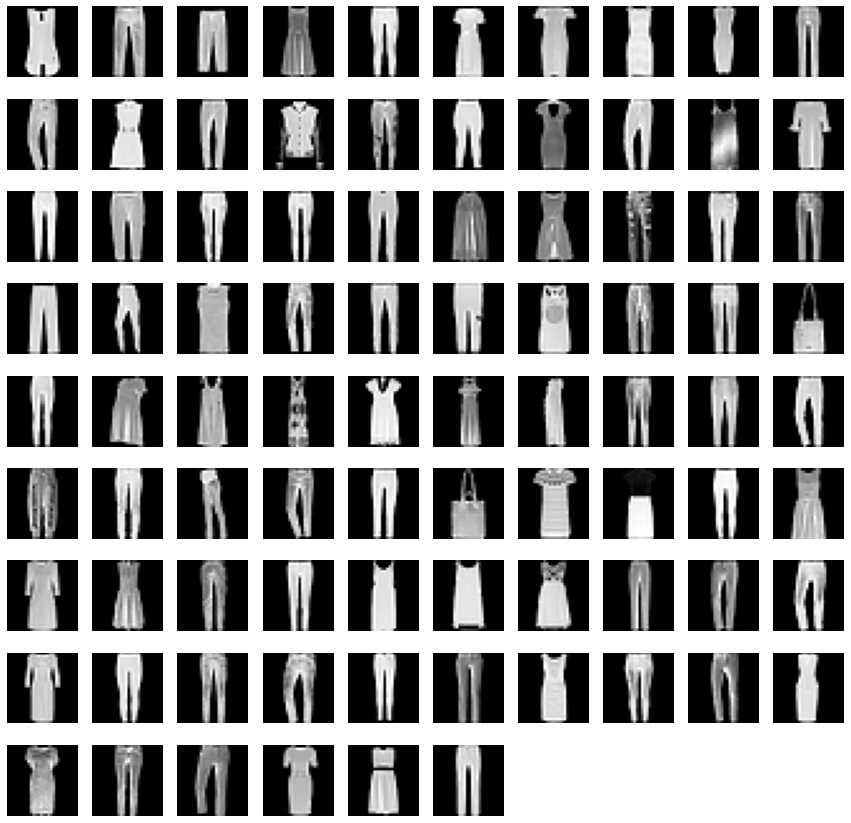

cluster 6
59 elements


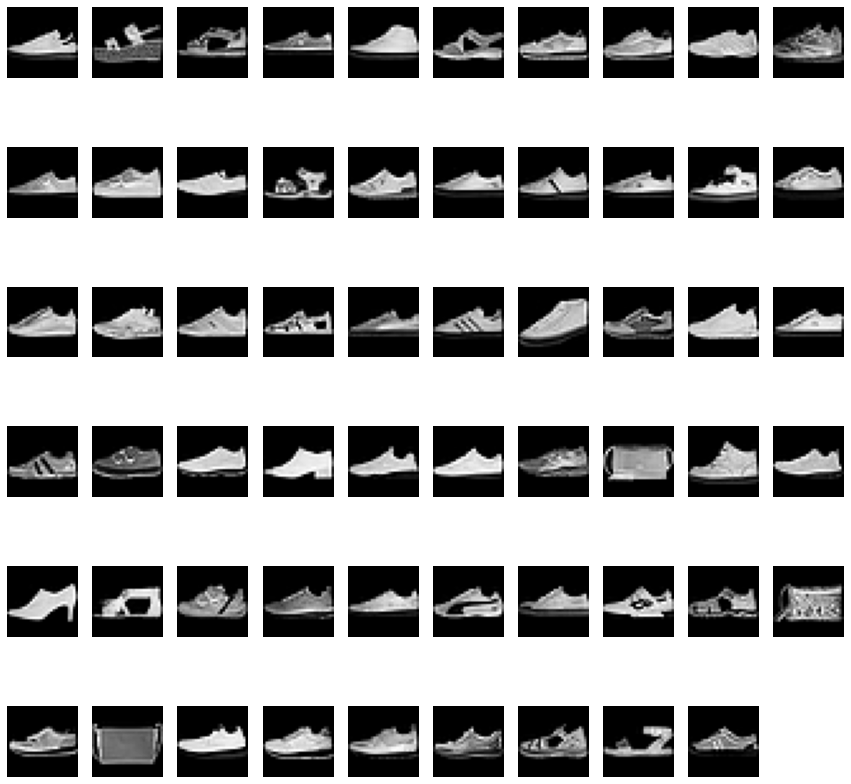

cluster 7
14 elements


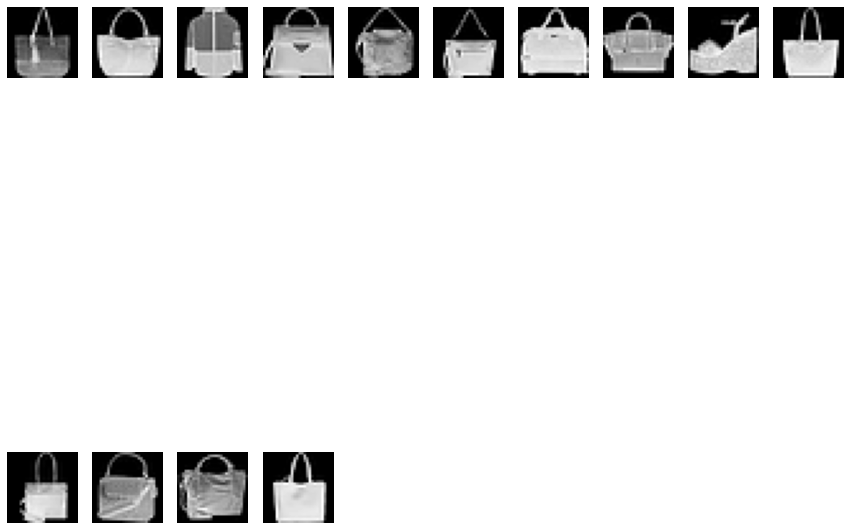

cluster 8
58 elements


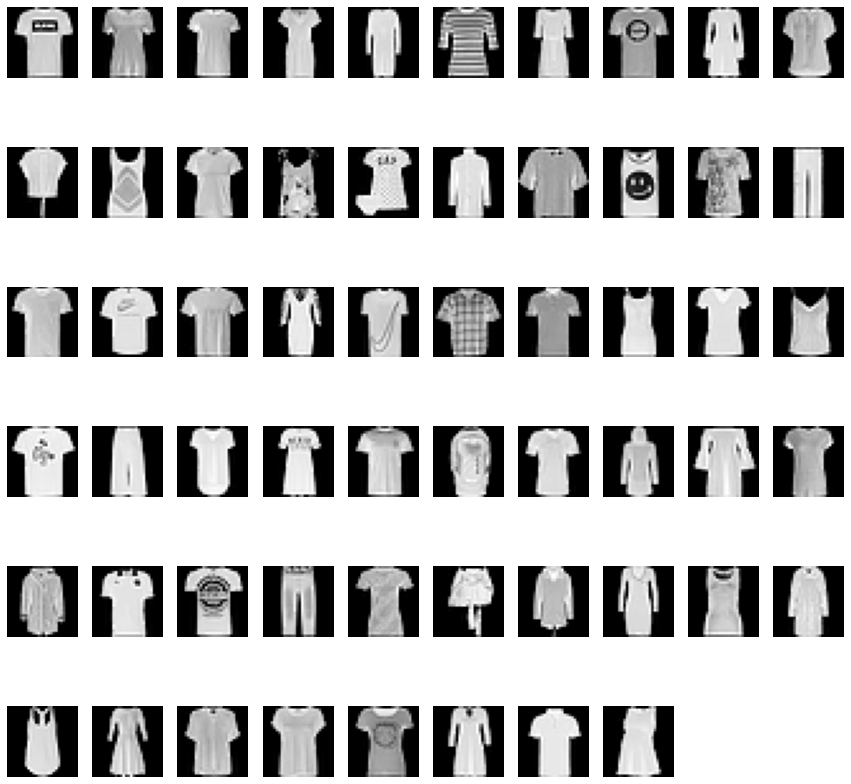

cluster 9
24 elements


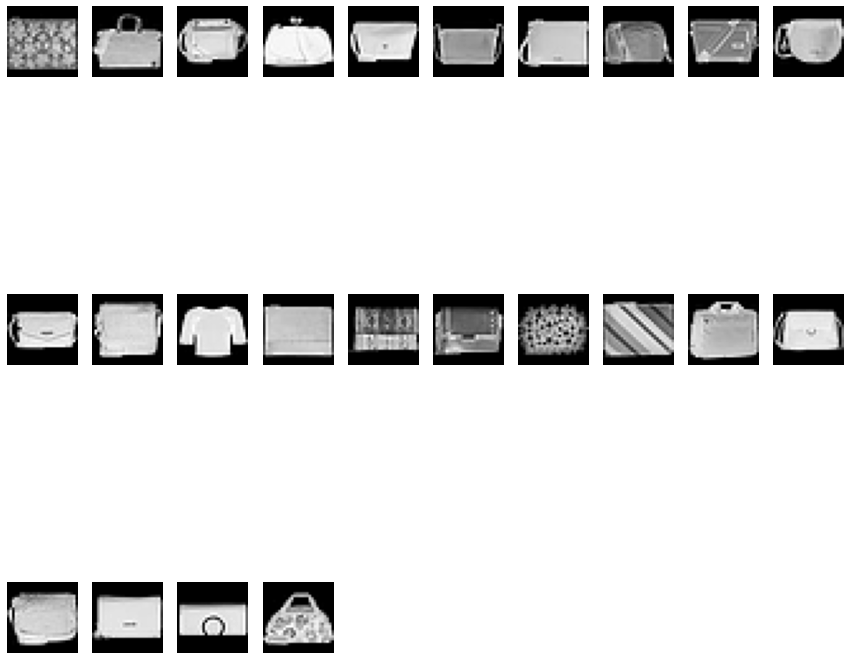

In [7]:
for i in range(0, 10):

    row = np.where(predictions==i)[0]  
    num = row.shape[0]       
    r = np.floor(num/10.)    
    print("cluster "+str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(15,15))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = x_train[row[k], ]
        image = image.reshape(28, 28)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

In [8]:
# В результате k-means разбил данные на 10 кластеров, но получилось так, что обувь является основой 4 кластеров, хотя классов обуви всего 3.
# Изменим количество кластеров.
model_1 = KMeans(n_clusters = 8, random_state=200)
model_1.fit(x_train)
predictions_1 = model_1.predict(x_train[:500].reshape(500, 784))

cluster 0
67 elements


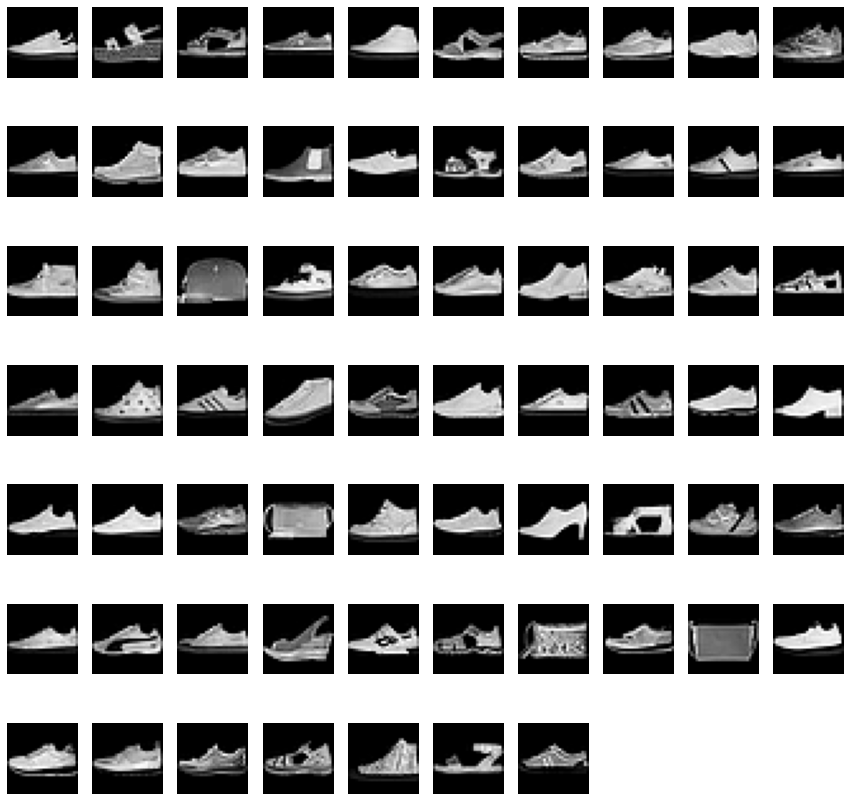

cluster 1
85 elements


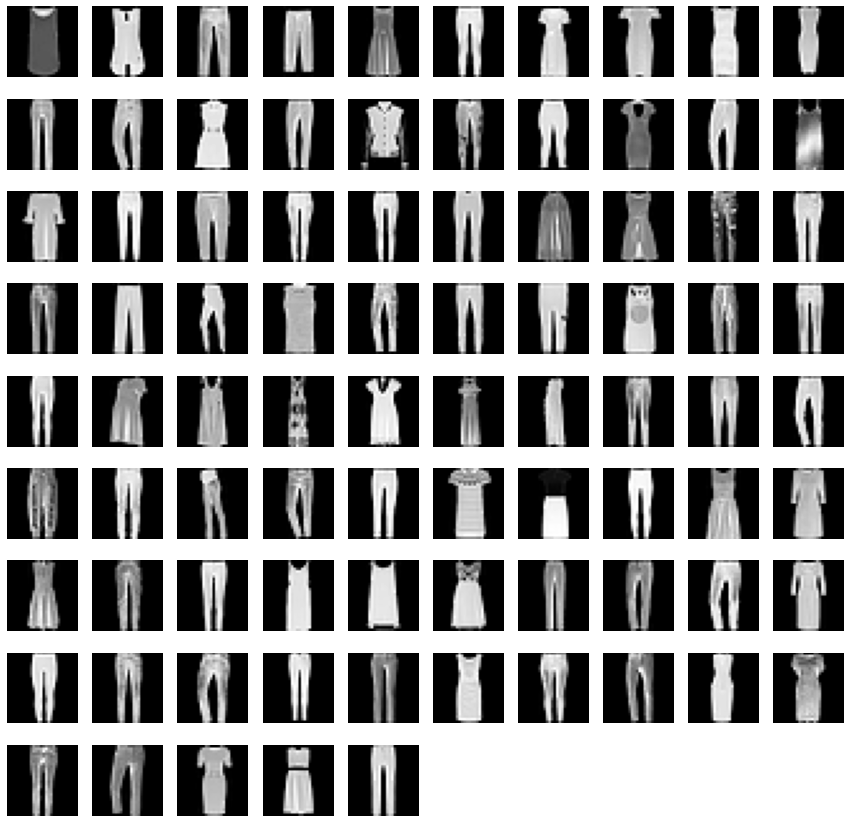

cluster 2
32 elements


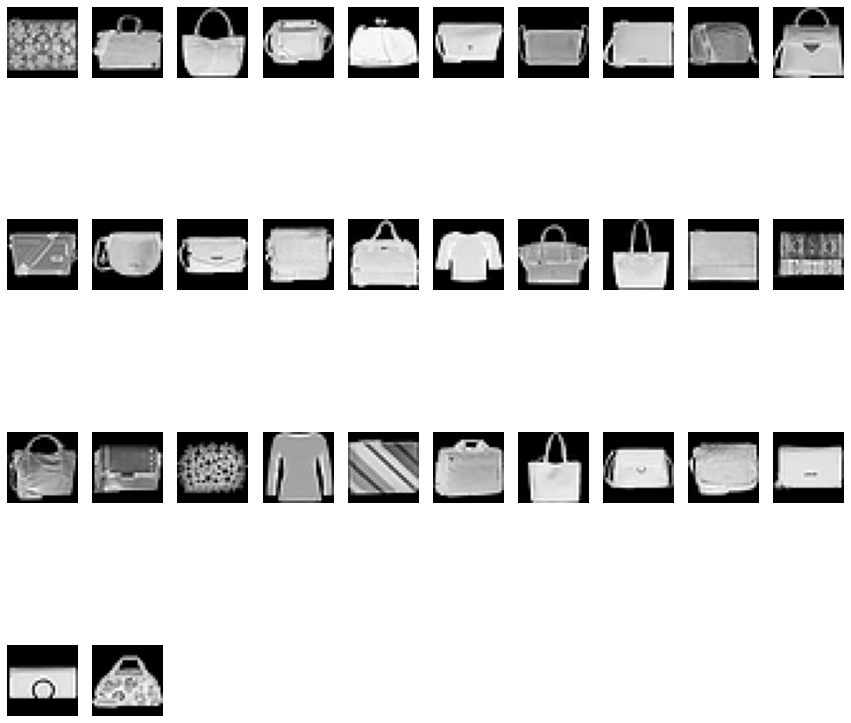

cluster 3
67 elements


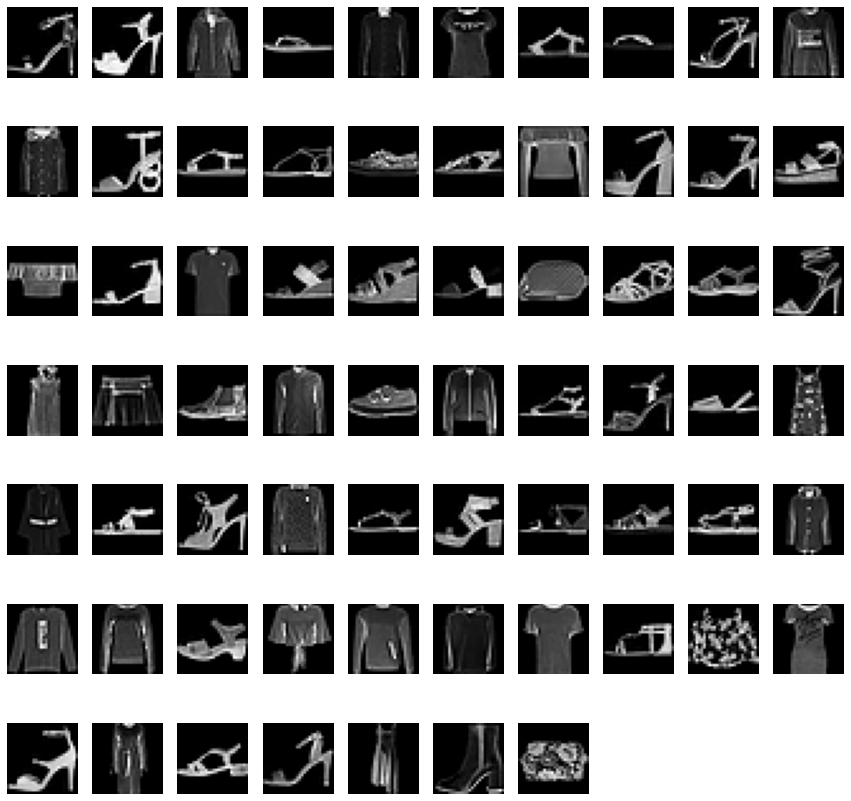

cluster 4
81 elements


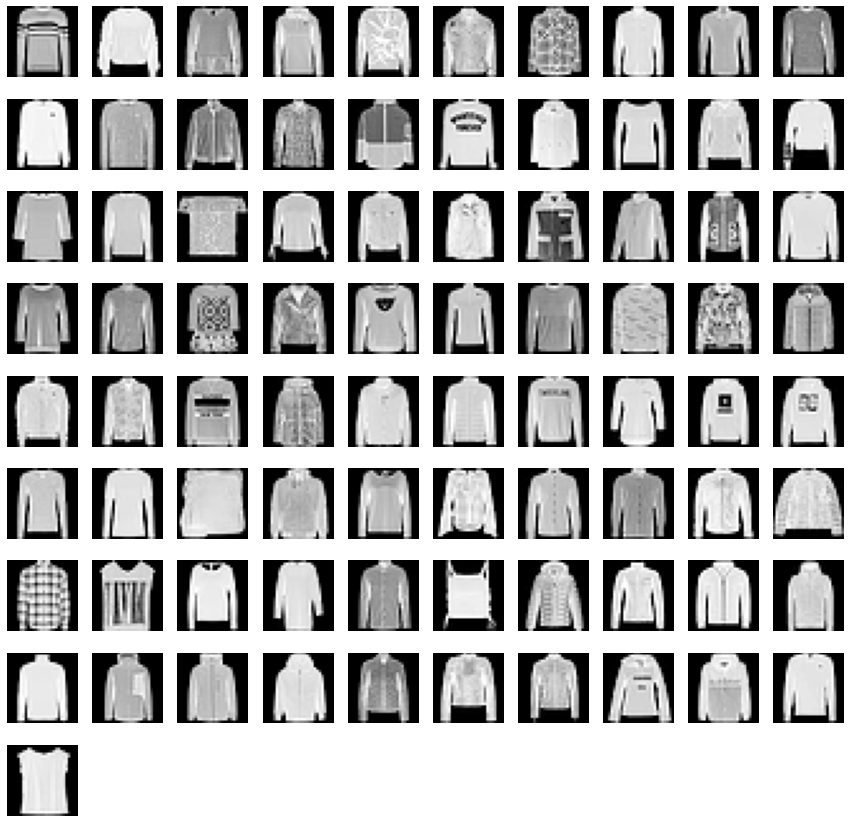

cluster 5
39 elements


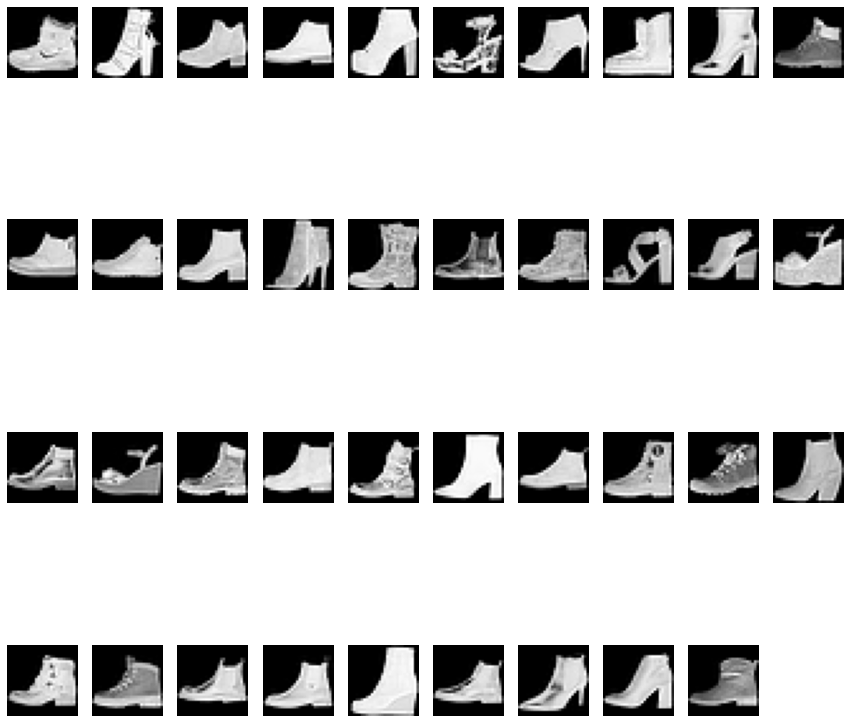

cluster 6
58 elements


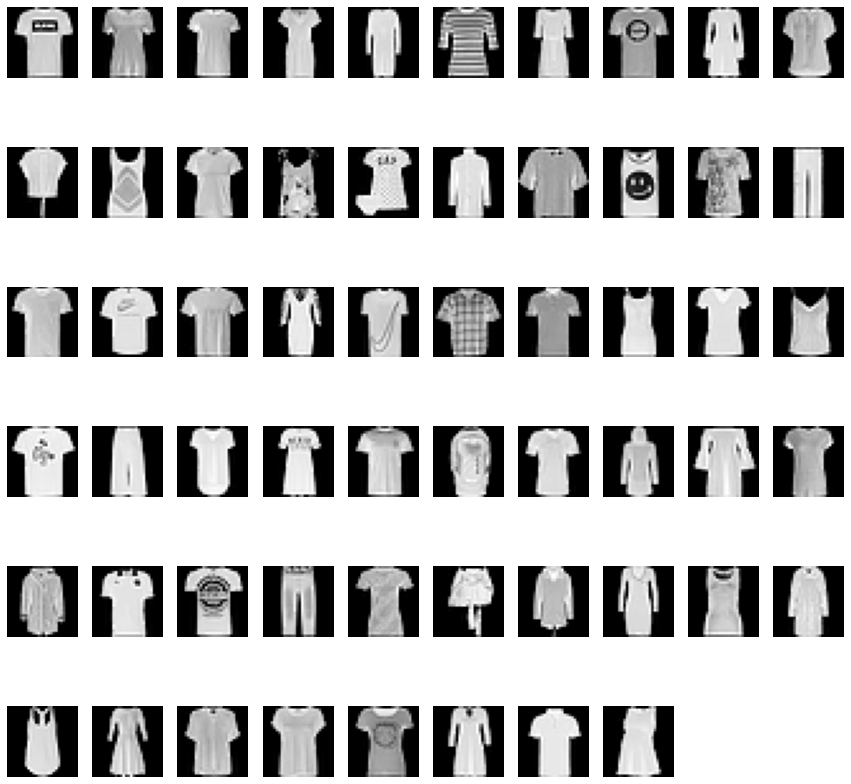

cluster 7
71 elements


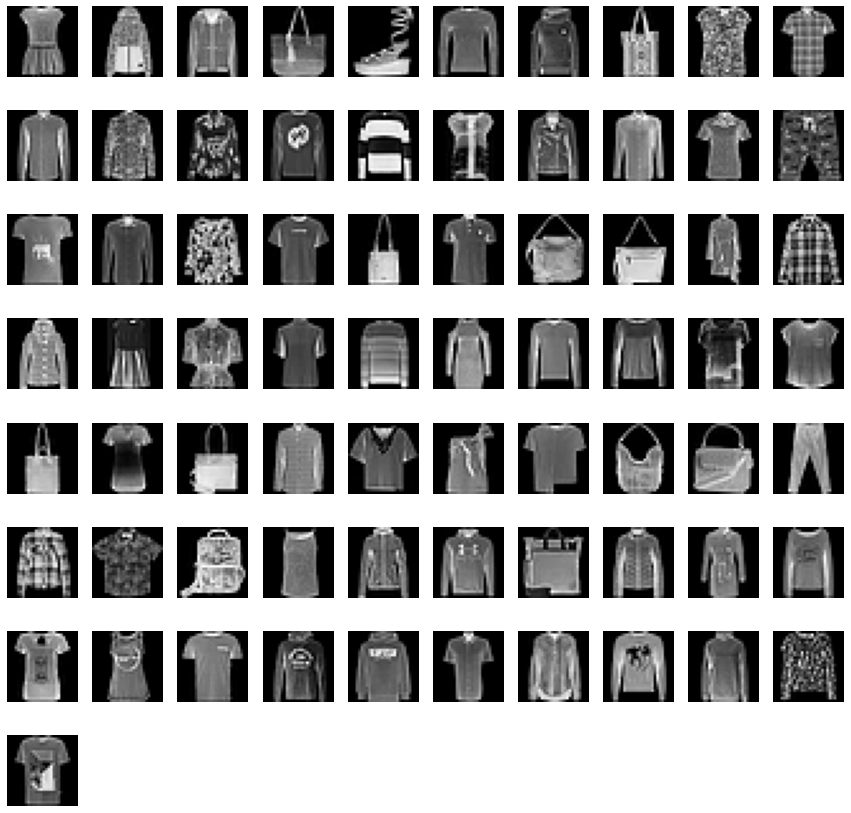

In [9]:
for i in range(0, 8):

    row = np.where(predictions_1==i)[0]  
    num = row.shape[0]       
    r = np.floor(num/10.)    
    print("cluster "+str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(15,15))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = x_train[row[k], ]
        image = image.reshape(28, 28)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

In [10]:
# Задача 2. Сегментация изображения с использованием k-means.
# Вычислите процентное содержание слюды (минерала самого темного цвета) в гранитной породе, разрез которой показан на фотографии.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

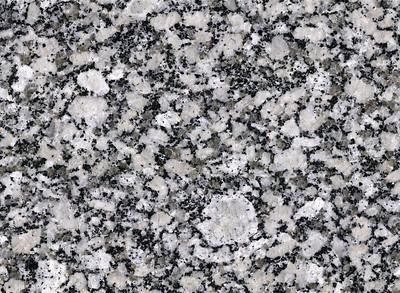

In [21]:
# Открываем изображение
img = Image.open('image_1.jpg')
img

In [22]:
img = img.convert('L')
img = np.asarray(img,dtype=np.float)

In [23]:
x , y = img.shape
img = img.reshape(x*y,1)

In [24]:
k_means = KMeans(n_clusters=3)
k_means.fit(img) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
centroids = k_means.cluster_centers_
labels = k_means.labels_

In [26]:
img = centroids[labels]

In [27]:
img = img.reshape(x, y)

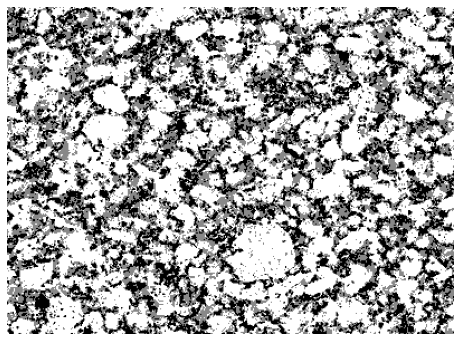

In [28]:
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [29]:
img = (img -  np.min(img))/(np.max(img)-np.min(img))*255
img = img.astype(np.uint8)
img = Image.fromarray(img)
w, h =img.size
colors = img.getcolors(w * h)


In [30]:
print('Ответ: процентное содержание слюды - ', colors[0][0]*100/(colors[0][0] + colors[1][0] + colors[2][0]))

Ответ: процентное содержание слюды -  22.064846416382252
